## 参数初始化 

In [23]:
from pyathena import connect 
import pandas as pd 
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import json
import urllib3

athena_output_bucket = 'smartmeter-workload-hxoq70dmst7-athenaquerybucket-e7ny5e3pg3iy'
region = 'cn-northeast-1'

connection = connect(s3_staging_dir='s3://{}/'.format(athena_output_bucket), region_name=region) 
APIUrl = 'https://rw54mkowm9.execute-api.cn-northwest-1.amazonaws.com.cn/{}'
ML_endpoint = "ml-endpoint-aaron"

<AxesSubplot:>

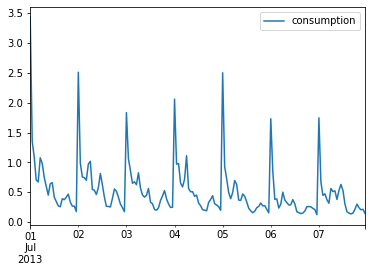

In [32]:
def get_forecast(meter_id, start, end):
    # Access API to get cluster endpoint name and temporary credentials
    http = urllib3.PoolManager()
    endpoint = "forecast/{}?data_start={}&data_end={}&ml_endpoint_name={}".format(meter_id, start, end, ML_endpoint)
    forecast_api_url = APIUrl.format(endpoint)

    response = http.request('GET', forecast_api_url)
    return response.data.decode()

resp = get_forecast('MAC000003', "2013-01-01", "2013-07-01")

# resp content like {"consumption":{"1370044800000":0.4627876282,"1370048400000":0.2913050354,...}}

# convert response to dataframe and visualize
df = pd.read_json(resp)
df.plot()


In [16]:
def get_outage(start, end):
    # Access API to get cluster endpoint name and temporary credentials
    http = urllib3.PoolManager()
    endpoint = "outage?start_date_time={}&end_date_time={}".format(start, end)
    outageAPIUrl = APIUrl.format(endpoint)

    response = http.request('GET', outageAPIUrl)

    return response.data

# Call rest API to get outages
resp = get_outage("2013-01-03 09:00:01", "2013-01-03 10:59:59")
'''
resp content like {
    "Items": [
        {
            "meter_id": "MAC000030",
            "reading_date_time": "2013-01-03 14:30:00.000",
            "reading_value": 0.084,
            "week_of_year": 1,
            "day_of_month": 3,
            "month": 1,
            "year": 2013,
            "hour": 14,
            "minute": 30,
            "reading_type": "INT",
            "date_str": "20130103",
            "lat": 40.73935542,
            "long": -73.99931783
        },
    ]
}
'''
data = json.loads(resp)
df = pd.DataFrame(data['Items']) 
df_result = df[['meter_id', 'lat', 'long']].drop_duplicates()
df_result

,meter_id,lat,long
0,MAC000032,40.705614,-73.921530
2,MAC000006,40.716059,-73.991908
6,MAC000021,40.759570,-73.914268
7,MAC000019,40.677274,-73.982820
8,MAC000020,40.727434,-73.993790
11,MAC000028,40.794566,-73.936254
18,MAC000030,40.739355,-73.999318
21,MAC000011,40.768009,-73.968453
22,MAC000034,40.733670,-74.062500
27,MAC000003,40.712605,-73.962644


<AxesSubplot:>

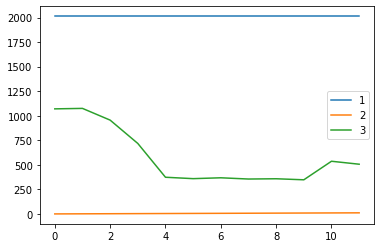

In [26]:
def get_aggre(year, meter_id):
    # Access API to get cluster endpoint name and temporary credentials
    http = urllib3.PoolManager()
    endpoint = "consumption/monthly/{}/{}".format(year, meter_id)
    aggreAPIUrl = APIUrl.format(endpoint)

    response = http.request('GET', aggreAPIUrl)

    return response.data

# Call rest API to get outages
resp = get_aggre("2013", "MAC000003")
'''
resp content like [
    [
        "MAC000003",
        2013,
        1,
        1070.2750029
    ],
'''

df = pd.read_json(resp)
df.plot()
